# __Learning X2K: Genetic Algorithm Results__

## __Import data__

In [4]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

import numpy as np
import matplotlib.pyplot as plt
import os
import Python_scripts.Extra_X2K_functions as Ex
root = '/Users/schilder/Desktop/X2K_Genetic_Algorithm'
root = os.getcwd()
picFormat='png'

# Data   
#GA_output_name = 'GA_results.100pop.10gen.GEO.run3.npy' #
#GA_output_name = 'GA_results.100pop.10gen.L1000-DRH.npy' #
#GA_output_name = 'GA_results_L1000-DRH.rboScore.npy' #
#GA_output_name = 'GA_results_GEO.RankWeightedMean.npy'
#GA_output_name = 'GA_results_GEO.wPPIlimiters.npy'
#GA_output_name = 'GA_results_GEO.wPPIlimiters_20gen.npy'
#GA_output_name = "GA_results_GEO.wPPIlimiters_20gen-try2.npy"
#GA_output_name = 'GAresults_GEO_Tournament.RBO.randCrossover.npy'\
GA_output_name = 'GAresults_GEO_Tournament.TAO.randCrossover.npy'



results_file = root+'/GA_Results/GEO/'+GA_output_name
#results_file = root+'/GA_Results/L1000_DRH/'+GA_output_name

GA_Results = np.load(results_file)
# Make folder for saved images
figDir = 'Figures/'+GA_output_name
if not os.path.exists(figDir):
    os.makedirs(figDir)
# Extract subsets
Subset1_df, Subset2_df, GAsettings = GA_Results

## __GA Settings__

In [2]:
GAsettings

{False: False,
 'binaryStringLength': 43,
 'breedingVariation': 0,
 'childrenPerGeneration': 90,
 'crossoverLocations': 'random',
 'crossoverPoints': 5,
 'fitnessMethod': 'targetAdjustedOverlap',
 'includeFittestParents': 10,
 'initialPopSize': 100,
 'mutationRate': 0.01,
 'numberOfGenerations': 20,
 'selectionMethod': 'mixedTournament',
 'topNum': 10}

## Report Peak Fitnesses

In [3]:
print('Peak fitness for Subset1 = '+str(round(Subset1_df.Fitness.max(),2)))
print('Peak fitness for Subset2 = '+str(round(Subset2_df.Fitness.max(),2))+'\n')
print("===============================\n")

print('OPTIMIZED PARAMETERS:')
fittestDF = Subset1_df.sort_values(by=['Fitness'], ascending=False).iloc[:10, :]
data = Ex.parameterDF(fittestDF)
uniqueOptimizations = data.iloc[:,4:].drop(['uniqueID'], axis=1).drop_duplicates()
print(uniqueOptimizations.transpose())

Peak fitness for Subset1 = 18.42
Peak fitness for Subset2 = 21.93


OPTIMIZED PARAMETERS:
                                                                   0
Fitness                                                      18.4211
baselineFitness                                              18.2018
PPI_size                                                     391.871
CHEA_parameters                run;rank;both;transfac;humanarchs4;20
G2N_parameters     run;BIND,DIP,HPRD,INNATEDB,INTACT,KEGG,MIPS,PD...
KEA_parameters                   run;combined_score;humanarchs4;P;20
TF_sort                                                         rank
TF_species                                                      both
TF_databases                                                transfac
TF_background                                            humanarchs4
TF_topTFs                                                         20
PPI_databases      BIND,DIP,HPRD,INNATEDB,INTACT,KEGG,MIPS,PDZBAS...
PPI_pathLengt

## __Overfitting Tests__

### Test Overfitting

In [4]:
import pandas as pd
lm_data = pd.DataFrame({'trainingFitness':Subset1_df.Fitness, 'testFitness':Subset2_df.Fitness})
## Get OLS R2
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('testFitness ~ trainingFitness',data=lm_data).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
p = aov_table['PR(>F)'][0]
mod.summary()

print(aov_table)
print("************************************************************************")
if p>0.05:
    print('Training and Test runs do NOT significantly differ.')
else:
    print('Training and Test runs DO significantly differ');

                       sum_sq      df         F    PR(>F)
trainingFitness    123.098320     1.0  7.333561  0.006826
Residual         33537.657297  1998.0       NaN       NaN
************************************************************************
Training and Test runs DO significantly differ


/Users/schilder/Library/Python/3.6/lib/python/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Average fitness 

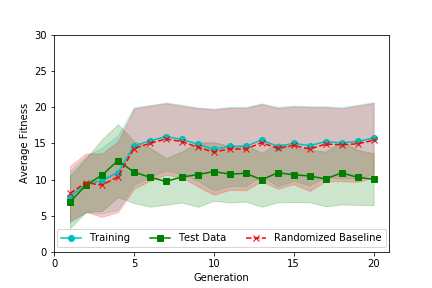

In [5]:
Ex.plotAverageFitness(Subset1_df, Subset2_df, barsOrFill="fill")
plt.savefig(figDir+'/OverfittingAverage.'+picFormat, format=picFormat, dpi=1000);

### Peak fitness

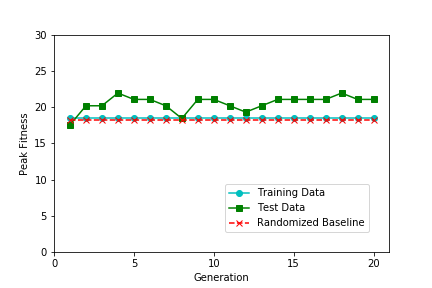

In [6]:
Ex.plotPeakFitness(Subset1_df, Subset2_df)
plt.savefig(figDir+'/OverfittingPeak.'+picFormat, format=picFormat, dpi=1000);

### Plot the distribution of ALL fitnesses in sampling of generations

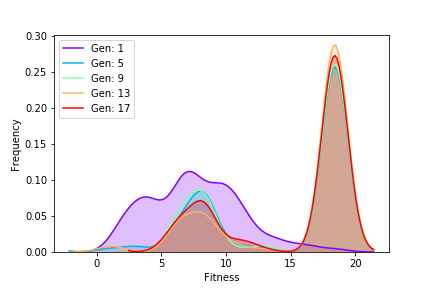

In [12]:
Ex.fitnessHistogramCurves(Subset1_df, genSpacing=4)
#plt.ylim([0,.3])
#plt.xlim([0,35])
plt.legend(loc='upper left')


plt.savefig(figDir+'/KDEfitnessPlot.'+picFormat, format=picFormat, dpi=1000);
# EPS format doesn't support transparency. Have to save as png instead.

## __4. X2K Parameters vs. Fitness Analyses__

### Plot Fitness and Parameter Evolution Over Time

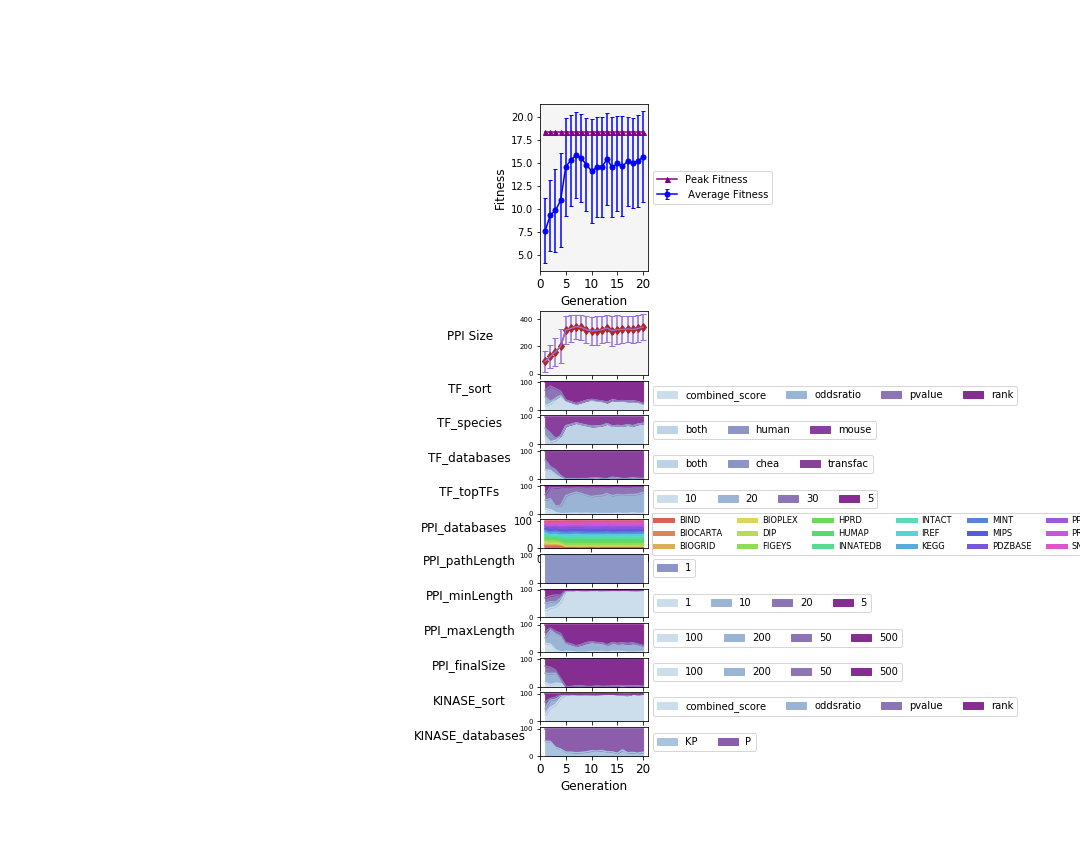

In [6]:
Ex.parameterEvolutionPlot(Subset1_df,figsize=(15,12), padRight=.6, padLeft=.5)

plt.savefig(figDir+'/ParamEvolution.'+picFormat, format=picFormat, dpi=1000);

### Plot Select X2K Parameters vs. Fitness

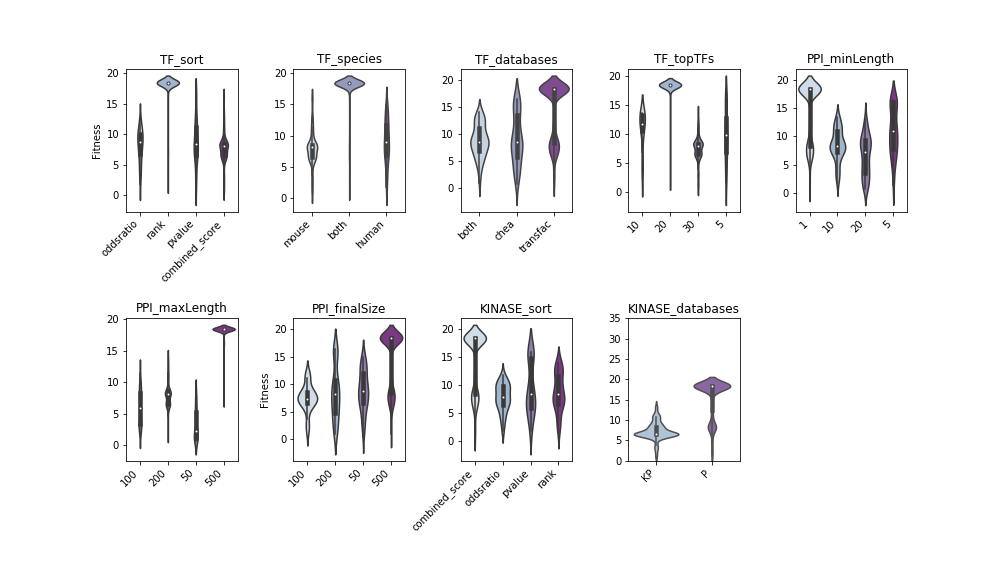

In [9]:
Ex.ParameterViolinPlots(Subset1_df, numRows=2, numCols=5, figSize=(14,8))
plt.ylim([0,35])
plt.gcf().set_facecolor('white');

plt.savefig(figDir+'/Parameters.Vs.Fitness.'+picFormat, format=picFormat, dpi=1000);

### One-way ANOVAs: Each parameter vs. Fitness

In [7]:
Ex.parameterStats(Subset1_df, writeExcel=figDir+"/Parameter.v.Fitness_ANOVA.table.xlsx")
#plt.savefig(figDir+'/Parameter.v.Fitness_ANOVA.table.eps', format='eps', dpi=1000)

/Users/schilder/Library/Python/3.6/lib/python/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Writing AOV results to excel file...


***** Fitness.Vs.Parameters *****

***** Fitness.Vs.baselineFitness *****


(      X2K Parameter     SS   DF F-value   P-value  Sig.
 0          PPI_size  49834    1    9435  < 0.0001  ****
 0           TF_sort  47305    3    2406  < 0.0001  ****
 0      TF_databases   5069    2      92  < 0.0001  ****
 0         TF_topTFs  48463    3    2704  < 0.0001  ****
 0     PPI_databases  58122  259     172  < 0.0001  ****
 0     PPI_minLength   9640    3     126  < 0.0001  ****
 0     PPI_maxLength  54694    3    6393  < 0.0001  ****
 0     PPI_finalSize   9179    3     119  < 0.0001  ****
 0       KINASE_sort   6647    3      82  < 0.0001  ****
 0  KINASE_databases  21832    1    1131  < 0.0001  ****,
   Generation    SS DF F-value   P-value  Sig.
 0          1  1089  1     638  < 0.0001  ****
 0          2  1284  1     647  < 0.0001  ****
 0          3  1746  1     560  < 0.0001  ****
 0          4  2362  1     987  < 0.0001  ****
 0          5  2802  1   10504  < 0.0001  ****
 0          6  2394  1    8118  < 0.0001  ****
 0          7  2159  1   11367  < 0.0001  *